<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 02: Julia lab - unconstrained optimization </font></p>
</p></br>
</p>
</CENTER>

----------------------------

In this lab, we want first to test the benefit of backtracking against constant stepsize for gradient or newton algorithms. Then, we will consider the behavior of conjugate-gradient and Polack-Ribière technique that work without knowledge of the Hessian matrix of the function to be optimized.

## <span style="color:#00B8DE"> I - Function plot </span>

**1)** Let us consider the function $f(x,y)=[(x-2)\sin(y-1)]^2+x^2+y^2$. 
Visualize this function on the square with vertices $(\pm 3,\pm 3)$.

## <span style="color:#00B8DE"> II - Backtracking </span>

**2)** Testing the benefit of backtracking. Calculate gradient of this function and implement gradient algorithm
for constant stepsize equal to .1 and then .01 and using backtracking. Compare the numbers of iterations necessary for convergence with initialization at point $(−4, -2)$ and residual error for the distance to the optimum smaller than $10^{−3}$.

## <span style="color:#00B8DE"> III - Gradient and Newton </span>
**3)** Implement Newton algorithm with backtracking to minimize $f(x,y)$ and compare results to gradient algorithm with backtracking.

## <span style="color:#00B8DE"> IV - Conjugate gradient </span>
**4)** Implement the conjugate-gradient algorithm and test it on a simple quadratic function $p({\bf x})=\frac 1 2 {\bf x^TAx}-{\bf x^Tb}$ with ${\bf A} = [1\; 0;0\; 5]$ and ${\bf b}=[1; 1]$.How many steps are required for convergence ? 

**5)** Consider a larger problem where 

        n = 10  # 100
        
        a = randn(n,n)
        
        A = a'*a + diagm(0=>ones(n)) # A = a'*a
        
        b = randn(n)

For $n=10,100$, check the influence of the condition number of ${\bf A}$ by adding or removing term **diagm(0=>ones(n))**.

## <span style="color:#00B8DE"> V - Polak-Ribière </span>
**6)** Considering again function, compare the performance of gradientand Polack-Ribiere algorithms with backtracking and initialization at point $(−4, -2)$. 

## <span style="color:#00B8DE"> VI - Changing initialization </span>
**7)** What occurs with these algorithms when changing intilialization to point $(-5,-0.5)$ ? Explain.


## <span style="color:#00B8DE">References (Wikipedia/book)</span>
> - [Gradient algorithm](http://en.wikipedia.org/wiki/Gradient_descent)
> - [Nonlinear conjugate gradient method and Polack-Ribière algoritm](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)
> - [Backtracking](http://www.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)  (p.464)


---------
### <span style="color:#00B8DE"> I - Function plot </span>


In [35]:
import Pkg; 
Pkg.add("Plotly");


 Resolving package versions...
 Installed JSExpr ──────────────── v0.5.1
 Installed Plotly ──────────────── v0.2.0
 Installed Hiccup ──────────────── v0.2.2
 Installed Mustache ────────────── v0.5.13
 Installed Pidfile ─────────────── v1.1.0
 Installed DocStringExtensions ─── v0.8.1
 Installed PlotlyJS ────────────── v0.13.0
 Installed WebIO ───────────────── v0.8.11
 Installed IniFile ─────────────── v0.5.0
 Installed Widgets ─────────────── v0.6.2
 Installed FunctionalCollections ─ v0.5.0
 Installed Mux ─────────────────── v0.7.0
 Installed AssetRegistry ───────── v0.1.0
 Installed Lazy ────────────────── v0.13.2
 Installed PlotlyBase ──────────── v0.3.0
 Installed Observables ─────────── v0.2.3
 Installed HTTP ────────────────── v0.8.6
 Installed WebSockets ──────────── v1.5.2
 Installed Blink ───────────────── v0.12.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [58dd65bb] + Plotly v0.2.0
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [bf4720bc] + AssetRegistry v

In [25]:
f(x,y)  = ((x-2)*sin(y-1))^2 + x^2 + y^2 
∇f(x,y)  =[2*(x-2)*(sin(y-1))^2+2*x; 2*(x-2)^2 * sin(y-1) * cos(y-1)+2*y]

∇f (generic function with 1 method)

In [26]:
opt = [0.09172811859570773;0.7789586896619789]
println("min f(x,y) = $(f(opt[1],opt[2]))")
println("optimum at (x*,y*) = ($(opt[1]),$(opt[2]))")

min f(x,y) = 0.7902328773913346
optimum at (x*,y*) = (0.09172811859570773,0.7789586896619789)


In [ ]:
using Plots;
pyplot()
x = collect(Float16, range(-3,length=100,stop=3));
y = collect(Float16, range(-3,length=100, stop=3));
z = f.(x,y);# ((x.-2).*sin(y.-1)).^2 + x.^2 + y.^2 ;
contour(x,y,z);

In [36]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
using Plotly;
pyplot()
n = 100;
x = range(-3, stop=3, length=n);
y = range(-3, stop=3, length=n);
z = f.(x,y);
#contour(x,y,z);
data = [
  [
    "z" =&gt; z,
    "x" =&gt; x,
    "y" =&gt; y,
    "type" =&gt; "contour"
  ]
]
response = Plotly.plot(data, ["filename" =&gt; "simple-contour", "fileopt" =&gt; "overwrite"])
plot_url = response["url"]

┌ Info: Precompiling Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1242
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6987488216158912258\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8427946949610078913\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6987488216158912258\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

LoadError: syntax: unexpected comma in matrix expression

In [43]:
using Plotly

size = 100
x = range(-2*pi, stop=2*pi, size)
y = range(-2*pi, stop=2*pi, size)
z = rand(size, size)
for i = 1:size
  for j = 1:size
    r2 = (x(i)^2 + y(j)^2)
        z(i,j) = sin(x(i))*cos(y(j))*sin(r2)/log(r2+1)


data = [
  [
    "z" =&gt; z
    "x" =&gt; x
    "y" =&gt; y
    "type" =&gt; "contour"
  ]
]
response = Plotly.plot(data, ["filename" =&gt; "simple-contour"; "fileopt" =&gt; "overwrite"])
plot_url = response["url"]

LoadError: syntax: incomplete: "for" at none:2 requires end

### <span style="color:#00B8DE"> II - Backtracking </span>

In [27]:
# Gradient algorithm
# constant stepsize
#-------------------
using LinearAlgebra: norm, transpose
precision = 1.e-8
max_iter  = 10e4
init      = [-4, -2]#[-5,-.5]

# Constant stepsize
pt         = init
nb_const   = 0 # number of loops
resu_const = pt
while norm(pt-opt)>precision && nb_const<max_iter
    pt = pt- 0.01 * ∇f(pt[1],pt[2])
    resu_const  = [resu_const pt]
    nb_const+=1
end

In [28]:
# Backtracking
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    t = 1
    alpha = 0.25
    beta = 0.7
    numberLoop = 0
    gradient = ∇f(x[1],x[2])
    while(f(x[1]+t*d[1],x[2]+t*d[2]) >f(x[1],x[2])+(alpha*t)*(transpose(gradient)*d))
        t=beta*t
        numberLoop+=1
    end
    x = x- t* ∇f(x[1],x[2]) 
    #d=.-∇f(pt[1],pt[2])   
    return (x, numberLoop)
    
end

backtracking (generic function with 1 method)

In [29]:
# Gradient algorithm
# with backtracking
#-------------------
pt             = init
nb_iter_grad   = 0  # number of loops
nb_loops_grad  = 0  # number of inner loops count for backtracking
resu_grad      = pt
while norm(pt-opt)>precision && nb_iter_grad<max_iter
    (pt,numberLoop)=backtracking(pt,f,∇f, -∇f(pt[1],pt[2]))
    nb_loops_grad+=numberLoop
    nb_iter_grad+=1
    resu_grad      = [resu_grad pt]
end

In [30]:
println("Error with constant stepsize: $(norm(resu_const[:,end]-opt))")
println("Number of iterations with constant stepsize: $nb_const\n\n")
    
println("Error with backtracking: $(norm(resu_grad[:,end]-opt))")
println("Number of iterations for backtracking= $nb_iter_grad")
println("Number of inner loops for backtracking = $nb_loops_grad")

Error with constant stepsize: 9.980669070114126e-9
Number of iterations with constant stepsize: 1491


Error with backtracking: 7.651366552586751e-9
Number of iterations for backtracking= 45
Number of inner loops for backtracking = 223


### <span style="color:#00B8DE"> III - Gradient and Newton </span>

In [31]:
function backtracking(x,f,∇f,∇2f, d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    t = 1
    alpha = 0.25
    beta = 0.7
    numberLoop = 0
    gradient = ∇f(x[1],x[2])
    while(f(x[1]+t*d[1],x[2]+t*d[2]) >f(x[1],x[2])+(alpha*t)*(transpose(gradient)*d))
        t=beta*t
        numberLoop+=1
    end
    x = x - inv(∇2f(x[1],x[2])) * ∇f(x[1],x[2])
    #d=.-∇f(pt[1],pt[2])   
    return (x, numberLoop)
    
end

backtracking (generic function with 2 methods)

In [32]:
# Newton algorithm (with backtracking)
#-------------------------------------
∇2f(x,y) = [[2*(sin(y-1)^2)+2 2*(x-2)*sin(2y-2)];[2*(x-2)*sin(2y-2) 2*(x-2)^2*cos(2*y-2)+2]]

pt        = init
nb_iter   = 0        # number of loops
nb_loops  = 0        # number of inner loops count for backtracking
resu_N    = pt
while norm(pt-opt)>precision && nb_iter<max_iter
    (pt,numberLoop) = backtracking(pt,f,∇f,∇2f,-∇f(pt[1],pt[2]))
    nb_loops+=numberLoop
    nb_iter+=1
    resu_N = [resu_N pt]
end

In [33]:
println("Error with Newton+backtracking: $(norm(resu_N[:,end]-opt))")
println("Number of iterations for Newton= $nb_iter")
println("Number of inner loops for Newton = $nb_loops")

Error with Newton+backtracking: 6.996747706783417e-10
Number of iterations for Newton= 60
Number of inner loops for Newton = 160


In [34]:
using LinearAlgebra: eigvals
println(eigvals(∇2f(pt[1],pt[2])))

[1.7083207988800078, 8.97065095290153]


In [35]:
# Figure: gradient and Newton with backtracking
...

LoadError: syntax: invalid identifier name "..."

### <span style="color:#00B8DE"> IV - Conjugate gradient </span>

In [36]:
using LinearAlgebra: norm

A=[1 0;0 5]
b=[1,1]
p(x,y)  = 0.5*transpose([x;y])*A*[x;y] - transpose([x;y])*b
∇p(x,y) = A * [x;y] - b
opt= inv(A)*b

2-element Array{Float64,1}:
 1.0
 0.2

In [37]:
precision = 1.e-8
max_iter  = 10e4
init      = [-2,3]

# optimal stepsize
pt            = init
nb_opt_grad   = 0 # number of loops
resu_opt_grad = pt
alpha = 0.01
#r = - ∇p(pt[1],pt[2])
#pd = r
while norm(pt-opt)>precision && nb_opt_grad<max_iter
    pt = pt - alpha * ∇p(pt[1], pt[2])
    resu_opt_grad = [resu_opt_grad pt]
    nb_opt_grad+=1
end

In [38]:
println("Error with gradient with optimal stepsize: $(norm(resu_opt_grad[:,end]-opt))")
println("Number of iterations = $nb_opt_grad")

Error with gradient with optimal stepsize: 9.915265608562155e-9
Number of iterations = 1943


In [39]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
using Plots
pyplot()

...

LoadError: syntax: invalid identifier name "..."

In [40]:
# Conjugate gradient
#--------------------
pt          = init
nb_iter_CG  = 0        # number of iterations
nb_loops_CG = 0        # number of inner loops count for backtracking
err_CG      = norm(pt-opt)
# initialization
r = - ∇p(pt[1],pt[2])
pd = r          
resu_CG = pt
# iterations
for k = 1:2
    alpha = (transpose(r) * r)/(transpose(pd)*A*pd)
    pt = pt + alpha * pd
    rOld = r
    r = r - alpha*A*pd
    beta = (transpose(r)*r)/(transpose(rOld)*rOld)
    pd= r + beta*pd
    nb_opt_grad+=1
    print(resu_CG)
    resu_CG = [resu_CG pt]
    err_CG = [err_CG norm(pt-opt)]
end
print(resu_CG)

[-2, 3][-2.0 -1.378159757330637; 3.0 0.09807886754297268][-2.0 -1.378159757330637 1.0; 3.0 0.09807886754297268 0.19999999999999923]

In [41]:
println("Error with CG: $(err_CG[end])")
println("Error number of iterations with CG: $(size(resu_CG)[2])")

Error with CG: 7.771561172376096e-16
Error number of iterations with CG: 3


In [42]:
# Figure: gradient with optimal step

### A larger problem

382.0133736243563


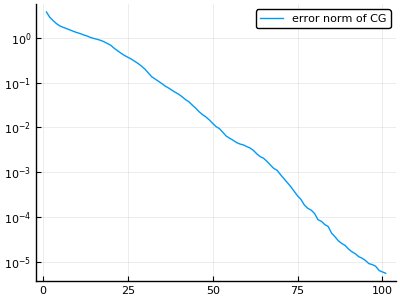

In [43]:
using Plots:plot
using LinearAlgebra: cond, diagm, norm

n = 100
A = randn(n,n)
A = A'*A + diagm(0=>ones(n))
println(cond(A))
b = randn(n)
opt = inv(A) * b

pt          = randn(n)
err_CG      = norm(pt-opt)

# initialization
p(x)  = 0.5*transpose(x)*A*x - transpose(x)*b
∇p(x) = A * x - b
r = - ∇p(pt)
pd = r                    
# iterations
for k = 1:n
    alpha = (transpose(r) * r)/(transpose(pd)*A*pd)
    pt = pt + alpha * pd
    rOld = r
    r = r - alpha*A*pd
    beta = (transpose(r)*r)/(transpose(rOld)*rOld)
    pd= r + beta*pd
    err_CG = [err_CG;norm(pt.-opt)]
end
plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))

### <span style="color:#00B8DE"> V - Polak-Ribière </span>

#### <span style="color:#00B8DE">Polack-Ribière method</span>

Initialization: 

> 1. initialize ${\bf x_0}$ and calculate $\Delta {\bf x_0}$, where $\Delta {\bf x_n}= - \nabla f ({\bf x_n})$ 
> 2. $\alpha_0 = \arg \min_\alpha f({\bf x_0}+\alpha \Delta {\bf x_0})$
> 3. ${\bf x_1}={\bf x_0}+\alpha_0 \Delta {\bf x_0}$

Iterations: 

> 1. $\beta_{n} = \frac{\nabla f ({\bf x_n})^{\top} (\nabla f ( {\bf x_n})-\nabla f ({\bf x_{n-1}}))} {\nabla f ({\bf x_{n-1})^{\top}} \nabla f ({\bf x_{n-1}})}$
> 2. ${\bf d_n}= -\nabla f ({\bf x_n})+\beta_n {\bf d_{n-1}}$
> 3. $\alpha_n=\arg \min_{\alpha} f({\bf x_n}+\alpha {\bf d_n})$
> 4. ${\bf x_{n+1}}={\bf x_n}+\alpha_{n} {\bf d_n}$


In [44]:
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    t: stepsize
    n: number of loops
    """
    t = 1
    alpha = 0.25
    beta = 0.7
    numberLoop = 0
    gradient = ∇f(x[1],x[2])
    while(f(x[1]+t*d[1],x[2]+t*d[2]) >f(x[1],x[2])+(alpha*t)*(transpose(gradient)*d))
        t=beta*t
        numberLoop+=1
    end  
    return (t, numberLoop)
    
end

backtracking (generic function with 2 methods)

In [45]:
# Polak-Ribière
#---------------
using LinearAlgebra: norm, transpose
precision = 1.e-8
max_iter  = 10e4
init      = [-4, -2]#[-5,-.5]
pt          = init
nb_iter_PR  = 0        # number of iterations
nb_loops_PR = 0        # number of inner loops count for backtracking
resu_PR     = pt
opt = [0.09172811859570773;0.7789586896619789]

f(x,y)  = ((x-2)*sin(y-1))^2 + x^2 + y^2 
∇f(x,y)  =[2*(x-2)*(sin(y-1))^2+2*x; 2*(x-2)^2 * sin(y-1) * cos(y-1)+2*y]

# initialization
r = -∇f(pt[1],pt[2])
pd = r 
(alpha, numberLoop)= backtracking(pt,f,∇f,pd)
nb_loops_PR+=numberLoop
ptOld = pt
pt = pt + alpha * pd

# iterations
while norm(pt-opt)>precision && nb_iter_PR<max_iter
    # iterations
    gradPt = ∇f(pt[1],pt[2])
    gradOldPt = ∇f(ptOld[1],ptOld[2])
    beta = transpose(gradPt)*(gradPt-gradOldPt)/(transpose(gradOldPt)*gradOldPt)
    pd = -gradPt + beta*pd
    (alpha, numberLoop)= backtracking(pt,f,∇f,pd)
    nb_loops_PR+=numberLoop
    ptOld = pt
    pt = pt + alpha * pd
    resu_PR = [resu_PR pt]
    nb_iter_PR+=1
end

In [46]:
println("Error with gradient = $(norm(resu_grad[:,end]-opt))")
println("Number of iterations = $nb_iter_grad")
println("Number of inner loops = $nb_loops_grad\n")

println("Error with Polack-Ribière = $(norm(resu_PR[:,end]-opt))")
println("Number of iterations = $nb_iter_PR")
println("Number of inner loops = $nb_loops_PR")

Error with gradient = 7.651366552586751e-9
Number of iterations = 45
Number of inner loops = 223

Error with Polack-Ribière = 4.364291720413405e-9
Number of iterations = 45
Number of inner loops = 522


In [ ]:
#Figure: Gradient and Polack-Ribière (with backtraking)
...